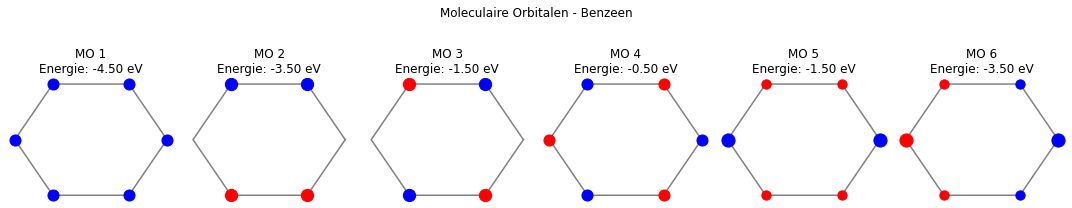

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
def imaginaire_delen_als_floats(lijst_met_complex):
    return [
        [
            float(getal.imag) if isinstance(getal, complex) and getal.imag != 0 else getal.real
            for getal in sublist
        ]
        for sublist in lijst_met_complex
    ]

def normaliseer(eigenvectors):
    for index, eigenvector in enumerate(eigenvectors):
        eigenvectors[index] = eigenvector * (np.dot(eigenvector, eigenvector))**(-1/2)
    return eigenvectors
          
matrix = [[-2.5, -1, 0, 0, 0, -1],
          [-1, -2.5, -1, 0, 0, 0],
          [0, -1, -2.5, -1, 0., 0.],
          [0, 0, -1., -2.5, -1., 0.],
          [0, 0, 0, -1, -2.5, -1],
          [-1, 0., 0., 0., -1., -2.5]]

lijst_vectoren = []
for i in range(6):
    lijst_vectoren.append([])
    for j in range(6):
        lijst_vectoren[i].append((round(math.cos(math.pi/3 * j * i), 2) + round(math.sin(math.pi/3 * j * i), 2) * 1j))

eigenwaarden = []

for vector in lijst_vectoren:
    eigenwaarden.append((np.dot(matrix[0], vector)).real)

dic_eigw_indexen = {}
for index, eigwaarde in enumerate(eigenwaarden):
    if eigwaarde not in dic_eigw_indexen:
        dic_eigw_indexen[eigwaarde] = []
    dic_eigw_indexen[eigwaarde].append(index)

new_lijst_vectoren = [[], [], [], [], [], []]
for indexen in dic_eigw_indexen.values():
    if len(indexen) != 1:
        new_lijst_vectoren[indexen[0]] = [x - y for x, y in zip(lijst_vectoren[indexen[0]], lijst_vectoren[indexen[1]])]
        new_lijst_vectoren[indexen[1]] = [x + y for x, y in zip(lijst_vectoren[indexen[0]], lijst_vectoren[indexen[1]])]

    else:
        new_lijst_vectoren[indexen[0]] = lijst_vectoren[indexen[0]]

new_lijst_vectoren = imaginaire_delen_als_floats(new_lijst_vectoren)


eigenvalues, eigenvectors = np.array(eigenwaarden), np.array(new_lijst_vectoren)
#normaliseren
eigenvectors = normaliseer(eigenvectors)

    
num_atoms = 6


# Plot de moleculaire orbitalen
fig, axs = plt.subplots(1, len(eigenvalues), figsize=(15, 3))

for i in range(len(eigenvalues)):
    ax = axs[i]

    # Plot de benzeenring
    benzene_x = np.cos(2 * np.pi / num_atoms * np.arange(num_atoms))
    benzene_y = np.sin(2 * np.pi / num_atoms * np.arange(num_atoms))
    ax.plot(benzene_x, benzene_y, linestyle='-', color='grey')
    ax.plot([benzene_x[-1], benzene_x[0]], [benzene_y[-1], benzene_y[0]], linestyle='-', color='grey')
    # Plot de atoomcoëfficiënten als gekleurde bollen
    for j in range(num_atoms):
        c = eigenvectors[i, j]

        if c > 0:
            color = 'blue'
        else:
            color = 'red'

        size = abs(c) * 300  # Schaal de grootte van de bol op basis van de coëfficiënt
        ax.scatter(benzene_x[j], benzene_y[j], s=size, marker='o', color=color, zorder=2)

    ax.set_title(f'MO {i + 1}\nEnergie: {eigenvalues[i]:.2f} eV')

    ax.axis('off')
# Stel het algehele plot-titel in
plt.suptitle('Moleculaire Orbitalen - Benzeen')

# Zorg ervoor dat de subplots niet overlappen
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Toon de plot
plt.show()
